In [26]:
import pandas as pd
import plotly_express as px
import seaborn as sns
import matplotlib.pyplot as plt

## Uppgift 1

In [27]:
veckodata_df = pd.read_excel('Data/Folkhalsomyndigheten_Covid19.xlsx', sheet_name='Veckodata Riket')

### a)  

Nedan visas ett urval ur och sammanfattning av tabellen.

Tabellen visar veckostatistik av antal fall, antal avlidna och antal patienter i intensivvård pga. Covid 19. Det finns olika mått av dessa t.ex. fall per populationsmillion och ackumulerat antal per vecka.

Urvalet är sorterat på år och veckonummer, datat startar på vecka 6 år 2020 och slutar på vecka 42 år 2022.

Det finns 142 rader och 13 kolumner, alla är av numeriska datatyper. Det finns inga nullvärden i datasettet.

In [28]:
veckodata_df.sort_values(['år', 'veckonummer'])

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.000000
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.000000
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.000000
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.000000
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,2022,38,4669,45,93,2585507,24910,22,9475,88,8.5,20303,1956.099976
138,2022,39,13532,130,175,2599039,25041,15,9490,92,8.9,20395,1965.000000
139,2022,40,3999,39,169,2603038,25079,19,9509,88,8.5,20483,1973.400024
140,2022,41,3408,33,72,2606446,25112,13,9522,73,7.0,20556,1980.500000


In [29]:
veckodata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              142 non-null    int64  
 1   veckonummer                     142 non-null    int64  
 2   Antal_fall_vecka                142 non-null    int64  
 3   Antal_fall_100000inv_vecka      142 non-null    int64  
 4   Antal_fall_100000inv_14dagar    142 non-null    int64  
 5   Kum_antal_fall                  142 non-null    int64  
 6   Kum_fall_100000inv              142 non-null    int64  
 7   Antal_nyaintensivvårdade_vecka  142 non-null    int64  
 8   Kum_antal_intensivvårdade       142 non-null    int64  
 9   Antal_avlidna_vecka             142 non-null    int64  
 10  Antal_avlidna_milj_inv_vecka    142 non-null    float64
 11  Kum_antal_avlidna               142 non-null    int64  
 12  Kum_antal_avlidna_milj_inv      142 

### b)

In [30]:
veckodata_df['Vecka'] = veckodata_df['år'].apply(str) + 'v' + veckodata_df['veckonummer'].apply(str)
veckodata_df[['år', 'veckonummer', 'Vecka']].head(3)

,år,veckonummer,Vecka
0,2020,6,2020v6
1,2020,7,2020v7
2,2020,8,2020v8


### c) Plotly

In [83]:
fig = px.line(veckodata_df, 
        x='Vecka', 
        y='Antal_avlidna_vecka',
        labels=dict(Antal_avlidna_vecka='Antal avlidna'),
        template='seaborn',
        title='Antal avlidna per vecka')

fig.update_layout(font_family="Arial")

fig.show()

fig.write_html("Visualiseringar/1c_plotly.html")

### d) Plotly

In [84]:
fig = px.line(veckodata_df, 
        x='Vecka', 
        y='Antal_fall_vecka',
        labels=dict(Antal_fall_vecka='Antal nya fall'),
        template='seaborn',
        title='Antal nya fall per vecka')

fig.update_layout(font_family="Arial")

fig.show()

fig.write_html("Visualiseringar/1d_plotly.html")

### e) Plotly

In [94]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Based on code found here: https://plotly.com/python/multiple-axes/

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=veckodata_df['Vecka'], 
               y=veckodata_df['Antal_avlidna_vecka'], 
               name="Antal avlidna"),

    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=veckodata_df['Vecka'], 
               y=veckodata_df['Antal_fall_vecka'], 
               name="Antal nya fall"),

    secondary_y=True,
)

fig.update_layout(font_family="Arial", 
                  template='seaborn', 
                  title='Antal avlidna (v. y-axel) och nya fall (h. y-axel) per vecka')

fig.show()

fig.write_html("Visualiseringar/1e_plotly.html")

### f) Plotly

In [86]:
fig = px.line(veckodata_df, 
        x='Vecka', 
        y='Kum_antal_fall',
        labels=dict(Kum_antal_fall='Kumulativt antal fall'),
        template='seaborn',
        title='Kumulativt antal fall per vecka')

fig.update_layout(font_family="Arial")

fig.show()

fig.write_html("Visualiseringar/1f_plotly.html")

### c) d) e) f) Seaborn

C:\Users\Skola\AppData\Local\Temp\ipykernel_9036\1651057069.py:14: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



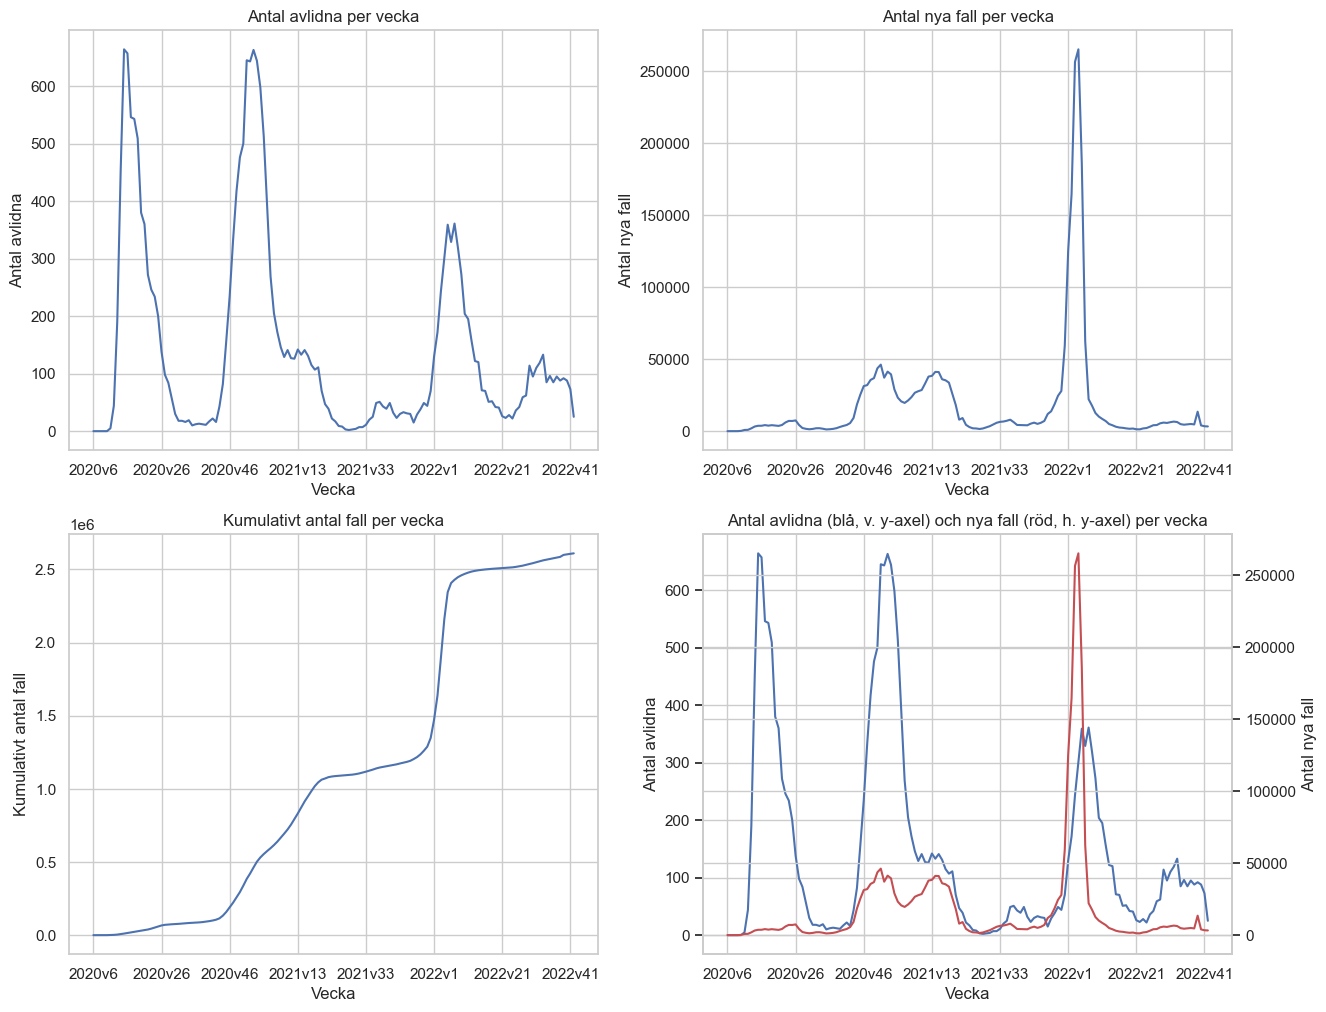

In [59]:
xticks = [veckodata_df['Vecka'][i] for i in range(0, len(veckodata_df['Vecka']), 20)]

sns.set_theme(style='whitegrid')

fig, ax = plt.subplots(2,2, figsize=(15,12))

ax[0][0] = sns.lineplot(veckodata_df, x='Vecka', y='Antal_avlidna_vecka', ax=ax[0][0]).set(title='Antal avlidna per vecka', ylabel='Antal avlidna', xticks=xticks)
ax[0][1] = sns.lineplot(veckodata_df, x='Vecka', y='Antal_fall_vecka', ax=ax[0][1]).set(title='Antal nya fall per vecka', ylabel='Antal nya fall', xticks=xticks)
ax[1][0] = sns.lineplot(veckodata_df, x='Vecka', y='Kum_antal_fall', ax=ax[1][0]).set(title='Kumulativt antal fall per vecka', ylabel='Kumulativt antal fall', xticks=xticks)
ax[1][1] = sns.lineplot(veckodata_df, x='Vecka', y='Antal_avlidna_vecka', color='b', ax=ax[1][1]).set(title='Antal avlidna (blå, v. y-axel) och nya fall (röd, h. y-axel) per vecka', ylabel='Antal avlidna', xticks=xticks)
ax2 = plt.twinx()
sns.lineplot(veckodata_df, x='Vecka', y='Antal_fall_vecka', color='r', ax=ax2).set(ylabel='Antal nya fall')

fig.show()

## Uppgift 2

In [60]:
vaccinerade_df = pd.read_excel('Data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx', sheet_name='Vaccinerade kommun och ålder')
vaccinerade_df

,Län,Län_namn,Kommun,Kommun_namn,Ålder,Befolkning,Antal minst 1 dos,Antal minst 2 doser,Antal 3 doser,Antal 4 doser,Andel minst 1 dos,Andel minst 2 doser,Andel 3 doser,Andel 4 doser
0,1,Stockholms län,114,Upplands Väsby,12-15,2422,1206,1046,NaN,NaN,0.497936,0.431874,NaN,NaN
1,1,Stockholms län,114,Upplands Väsby,16-17,1203,839,755,NaN,NaN,0.697423,0.627598,NaN,NaN
2,1,Stockholms län,114,Upplands Väsby,18-29,6692,4887,4469,1959.0,NaN,0.730275,0.667812,0.292738,NaN
3,1,Stockholms län,114,Upplands Väsby,30-39,7332,5542,5240,2878.0,NaN,0.755865,0.714675,0.392526,NaN
4,1,Stockholms län,114,Upplands Väsby,40-49,6946,5592,5429,3719.0,NaN,0.805068,0.781601,0.535416,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,25,Norrbottens län,2584,Kiruna,50-59,3079,2878,2860,2482.0,NaN,0.934719,0.928873,0.806106,NaN
2896,25,Norrbottens län,2584,Kiruna,60-69,2781,2648,2633,2434.0,NaN,0.952175,0.946782,0.875225,NaN
2897,25,Norrbottens län,2584,Kiruna,70-79,2194,2115,2108,2034.0,1784.0,0.963993,0.960802,0.927074,0.813127
2898,25,Norrbottens län,2584,Kiruna,80-89,1280,1256,1253,1220.0,1091.0,0.981250,0.978906,0.953125,0.852344


### a)

In [14]:
print(f'Antal län: {vaccinerade_df.value_counts("Län_namn").count()}')

Antal län: 21


### b)

In [15]:
print(f'Antal kommuner: {vaccinerade_df.value_counts("Kommun_namn").count()}')

Antal kommuner: 290


### c)

In [62]:
befolkning = vaccinerade_df["Befolkning"].sum()

print(f'Befolkning: {befolkning}')

Befolkning: 9092790


### d)

In [66]:
age_12_17_sum = vaccinerade_df.query('Ålder == "12-15" or Ålder == "16-17"')['Befolkning'].sum()

print(f'Antal personer med ålder 12-17 i datasettet: {age_12_17_sum}')
print(f'Andel personer med ålder 12-17 i datasettet: {age_12_17_sum / befolkning:.1%}')

Antal personer med ålder 12-17 i datasettet: 745370
Andel personer med ålder 12-17 i datasettet: 8.2%


Om vi antar att åldersfördelningen i datasettet motsvarar totala befolkningens fördelning, och att åldersfördelningen på personer under 18 är likformig så har vi  
Ålder 0-5: 8,2%  
Ålder 6-11: 8,2%  
Ålder 12-17: 8,2%  
Sveriges befolkning (2021): 10 420 000  
Uppskattning antal personer under 18 år: 0,082 * 3 * 10 420 000 = 2 563 320

### e)

In [87]:
fig = px.bar(vaccinerade_df.groupby('Ålder')['Befolkning'].sum(),
            labels=dict(variable='', value='Antal personer'),
            template='seaborn',
            title='Befolkning ur datasetet per åldersintervall')

fig.update_layout(font_family="Arial",
                showlegend=False)

fig.show()

fig.write_html("Visualiseringar/2e_plotly.html")

### f)

In [88]:
län_df = vaccinerade_df.groupby('Län_namn')[['Län_namn', 'Befolkning', 'Antal minst 1 dos', 'Antal minst 2 doser', 'Antal 3 doser', 'Antal 4 doser']].sum()
län_df['Andel minst 1 dos'] = län_df['Antal minst 1 dos'] / län_df['Befolkning']
län_df['Andel minst 2 doser'] = län_df['Antal minst 2 doser'] / län_df['Befolkning']
län_df['Andel 3 doser'] = län_df['Antal 3 doser'] / län_df['Befolkning']
län_df['Andel 4 doser'] = län_df['Antal 4 doser'] / län_df['Befolkning']

fig = px.bar(län_df, 
            y=['Andel minst 1 dos', 'Andel minst 2 doser', 'Andel 3 doser'], 
            barmode='group',
            labels=dict(variable='', value='Andel', Län_namn='Län'),
            template='seaborn',
            title='Andel dosantal per län')

fig.update_layout(font_family="Arial")

fig.show()

fig.write_html("Visualiseringar/2f_plotly.html")

### g)

In [89]:
län_vg_st = län_df.query('Län_namn == "Västra Götalands län" or Län_namn == "Stockholms län"')

fig = px.bar(län_vg_st, 
            y=['Andel minst 1 dos', 'Andel minst 2 doser', 'Andel 3 doser', 'Andel 4 doser'], 
            barmode='group',
            labels=dict(variable='', value='Andel', Län_namn='Län'),
            template='seaborn',
            title='Andel dosantal Stockholms län och Västra Götalands län')

fig.update_layout(font_family="Arial")

fig.show()

fig.write_html("Visualiseringar/2g_plotly.html")

## Uppgift 3

De KPIer jag har valt att titta på är:  
- Antal avlidna / Antal fall per åldersgrupp
- Antal avlidna / Antal fall per kön
- Antal avlidna / Antal fall per region
- Korrelation mellan Andel avlidna och Minst 3 doser per region

In [90]:
åldersgrupp_df = pd.read_excel('Data/Folkhalsomyndigheten_Covid19.xlsx', sheet_name='Totalt antal per åldersgrupp')
åldersgrupp_df['Andel avlidna'] = åldersgrupp_df['Totalt_antal_avlidna'] / åldersgrupp_df['Totalt_antal_fall']
åldersgrupp_df['Åldersgrupp'] = åldersgrupp_df['Åldersgrupp'].str.replace('Ålder_', '')

fig = px.bar(åldersgrupp_df, 
            x='Åldersgrupp',
            y='Andel avlidna', 
            template='seaborn',
            title='Andel avlidna av totala antalet fall per åldersgrupp')

fig.update_layout(font_family="Arial")

fig.show()

fig.write_html("Visualiseringar/3_1_plotly.html")

Det är tydligt att en högre ålder ökar risken för att avlida om man drabbas av Covid 19.

In [91]:
kön_df = pd.read_excel('Data/Folkhalsomyndigheten_Covid19.xlsx', sheet_name='Totalt antal per kön')
kön_df['Andel avlidna'] = kön_df['Totalt_antal_avlidna'] / kön_df['Totalt_antal_fall']

fig = px.bar(kön_df, 
            x='Kön',
            y='Andel avlidna', 
            template='seaborn',
            title='Andel avlidna av totala antalet fall per kön')

fig.update_layout(font_family="Arial")

fig.show()

fig.write_html("Visualiseringar/3_2_plotly.html")

Av alla män som drabbats av Covid 19 har 0,93% avlidit, samma siffra för kvinnor är 0,67%. Som man har man alltså 0,93% / 0,67% - 1 = 39% högre risk att avlida.

In [92]:
region_df = pd.read_excel('Data/Folkhalsomyndigheten_Covid19.xlsx', sheet_name='Totalt antal per region')
region_df['Andel avlidna'] = region_df['Totalt_antal_avlidna'] / region_df['Totalt_antal_fall']
region_df.sort_values('Andel avlidna', ascending=False, inplace=True)

fig = px.bar(region_df, 
            x='Region',
            y='Andel avlidna', 
            template='seaborn',
            title='Andel avlidna av totala antalet fall per region')

fig.update_layout(font_family="Arial")

fig.show()

fig.write_html("Visualiseringar/3_3_plotly.html")

Västernorrland, Gävleborg och Sörmland är de regioner med högst andel avlidna, och Halland, Örebro och Jämtland Härjedalen är de med lägst. En drabbad i Västernorrland jämfört med en i Halland har 1,21% / 0,48% - 1 = 152% högre risk att avlida.

In [96]:
dos_region_df = pd.read_excel('Data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx', sheet_name='Dos 1 till 3 per åldersgrupp')

# Exkludera åldersgruppen 'Totalt 18+' för att inte dubbelräkna individer
dos_region_df.query('Vaccinationsstatus == "Minst 3 doser" and Åldersgrupp != "Totalt 18+"', inplace=True)

# Lös ekvationen Befolkning * Andel vaccinerade = Antal vaccinerade
dos_region_df['Befolkning'] = dos_region_df['Antal vaccinerade'] / dos_region_df['Andel vaccinerade']

dos_regioner = dos_region_df.groupby('Region')[['Antal vaccinerade', 'Befolkning']].sum()
dos_regioner['Andel vaccinerade minst 3 doser'] = dos_regioner['Antal vaccinerade'] / dos_regioner['Befolkning']

# Merga med region_df för att lägga på kolumnen Andel avlidna
dos_regioner = dos_regioner.merge(region_df, how='inner', on='Region')

fig = px.scatter(dos_regioner, 
                 x='Andel vaccinerade minst 3 doser', 
                 y='Andel avlidna', 
                 size='Befolkning',
                 template='seaborn',
                 title='Andel avlidna och andel vaccinerade per region',
                 width=800, height=600,
                 hover_name='Region')

fig.update_layout(font_family="Arial")

fig.show()

fig.write_html("Visualiseringar/3_4_plotly.html")

print(f'Korrelationskoefficienten mellan de två variablerna: {dos_regioner["Andel vaccinerade minst 3 doser"].corr(dos_regioner["Andel avlidna"]):.3f}')

Korrelationskoefficienten mellan de två variablerna: -0.195


Spridningsdiagrammet visar de 21 regionerna baserat på de två dimensionerna Andel avlidna och Andel vaccinerade minst 3 doser. Storleken på punkterna representerar befolkningsstorlekarna. Tanken är att se hur starkt sambandet är mellan de två variablerna, har de regioner som i större utsträckning är vaccinerade färre avlidna?  
Korrelationskoefficienten är -0,2 vilket tyder på ett svagt samband. Man skulle kunna tänkt sig att sambandet är närmare -1 eftersom sambandet i teorin är negativ, vaccinationsgrad borde ha ett negativs samband med mängden avlidna.  
Tidigare har vi sett att ålder har en effekt på hur trolig man är att avlida av Covid 19, detta kan förklara det svaga sambandet (-0,2), om regionernas individer som insjuknat skiljer sig i åldersfördelning så blir det svårt att göra jämförelsen ovan rakt av.